In [32]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mig
# from scipy import signal

import cv2

(256, 256)


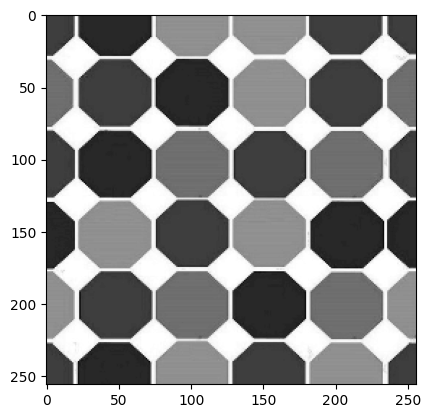

In [33]:
image = mig.imread("old.jpg")
image = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
image = cv2.resize(image, (256,256))
plt.imshow(image, cmap="gray")
print(image.shape)

# wavelet

In [34]:
lo = np.array([[0.7071067812],  [0.7071067812]]) #low-pass 
hi = np.array([[-0.7071067812],  [0.7071067812]]) #high-pass

In [35]:
class wavelet:
    def __init__ (self,image, kernel_lo, kernel_hi):
        self.image = image
        self.kernel_lo=kernel_lo
        self.kernel_hi=kernel_hi

    def filter (self,matriks, kernel):
        tinggi, lebar = matriks.shape
        tinggiK, lebarK = kernel.shape

        h2, w2 = int ((tinggiK-1)/2), int ((lebarK-1)/2)
        result = np.zeros(matriks.shape)

        pad = np.pad(matriks, ( 
            (h2, tinggiK-h2),
            (w2, lebarK-w2)), 
            'constant' )
        panjang, lebar = matriks.shape

        for i in range (tinggi):
            for j in range (lebar):
                for k in range (tinggiK):
                    for l in range (lebarK):
                        result[i,j] += pad[i+k,j+l] * kernel[k,l]
        return np.array(result, dtype=int)

    # def approximate(self):
    #     #conv low low

    #     #konvolusi dengan low filter row
    #     l = self.filter(self.image, self.kernel_lo)
    #     #downsampling row
    #     dl = l[::2,::]
        
    #     #konvolusi dengan low filter col    
    #     ll = self.filter(dl, np.transpose(self.kernel_lo))
    #     #downsampling col
    #     dll = ll[::,::2]

    #     return dll
    
    # def horizontal(self):
    #     #conv low hi

    #     #konvolusi dengan low filter row
    #     l = self.filter(self.image, self.kernel_lo)
    #     #downsampling row
    #     dl = l[::2,::]
        
    #     #konvolusi dengan hi filter col    
    #     lh = self.filter(dl, np.transpose(self.kernel_hi))
    #     #downsampling col
    #     dlh = lh[::,::2]

    #     return dlh
    
    # def vertical (self):
    #     #conv hi lo

    #     #konvolusi dengan hi filter row
    #     h = self.filter(self.image, self.kernel_hi)
    #     #downsampling row
    #     dh = h[::2,::]
        
    #     #konvolusi dengan lo filter col    
    #     hl = self.filter(dh, np.transpose(self.kernel_lo))
    #     #downsampling col
    #     dhl = hl[::,::2]

    #     return dhl
    
    def diagonal (self):
        #conv hi hi

        #konvolusi dengan hi filter row
        h = self.filter(self.image, self.kernel_hi)
        #downsampling row
        dh = h[::2,::]
        
        #konvolusi dengan ii filter col    
        hh = self.filter(dh, np.transpose(self.kernel_hi))
        #downsampling col
        dhh = hh[::,::2]

        return dhh

    def result_overview(self):
        plt.figure(figsize=(10,10))
        plt.xticks([])
        plt.yticks([])
        # plt.subplot(2,2,1)
        # plt.title("approximate")
        # plt.imshow(self.approximate(), cmap="gray")
        
        # plt.subplot(2,2,2)
        # plt.title("horizontal")
        # plt.imshow(self.horizontal(), cmap="gray")

        # plt.subplot(2,2,3)
        # plt.title("vertical")
        # plt.imshow(self.vertical(), cmap="gray")

        plt.subplot(2,2,4)
        plt.title("diagonal")
        plt.imshow(self.diagonal(), cmap="gray")
    


C:\Users\HAPPY COM\AppData\Local\Temp\ipykernel_18660\1802934283.py:103: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(2,2,4)


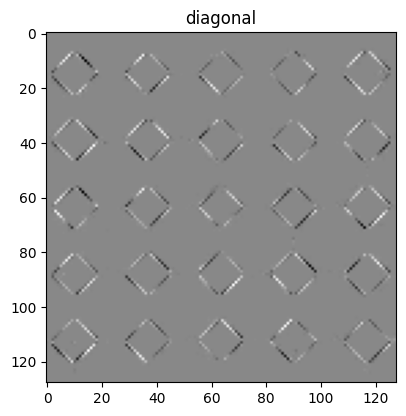

In [36]:
obj = wavelet(image, lo, hi)
obj.result_overview()

# reverse

In [37]:
ilo = np.array ([[0.7071067812],
                [0.7071067812]])

ihi = np.array ([[0.7071067812],
                [-0.7071067812]])

In [38]:
class inverse_wavelet:
    def __init__(self,ll, lh, hl, hh, ilo, ihi):
        self.ll = ll
        self.lh = lh
        self.hl = hl
        self.hh = hh
        self.ilo = ilo
        self.ihi = ihi

    def filter (self,matriks, kernel):
        tinggi, lebar = matriks.shape
        tinggiK, lebarK = kernel.shape

        h2, w2 = int ((tinggiK-1)/2), int ((lebarK-1)/2)
        result = np.zeros(matriks.shape)

        pad = np.pad(matriks, ( 
            (h2, tinggiK-h2),
            (w2, lebarK-w2)), 
            'constant' )
        panjang, lebar = matriks.shape

        for i in range (tinggi):
            for j in range (lebar):
                for k in range (tinggiK):
                    for l in range (lebarK):
                        result[i,j] += pad[i+k,j+l] * kernel[k,l]
        return np.array(result, dtype="int")
    
    def upsample(self, matrix, dir):
        # baris = 0, kolom = 1
        h, w = matrix.shape
        if dir == 1:
            res = np.zeros([h,w*2])
            res[::,::2] = matrix
            return np.array(res, dtype=int)
        else:
            res = np.zeros([h*2,w])
            res[::2,::] = matrix
            return np.array(res, dtype="int")
    
    def ill(self):
        # low low
        u = self.upsample(self.ll,1)
        ul = self.filter(u, np.transpose(self.ilo))
        return(ul)

    def ilh(self):
        # hi low
        u = self.upsample(self.lh,1)
        uh = self.filter(u, np.transpose(self.ihi))
        return(uh)

    def ihl(self):
        # lo hi
        u = self.upsample(self.hl,1)
        ul = self.filter(u, np.transpose(self.ilo))
        return(ul)


    def ihh(self):
        # hi hi
        u = self.upsample(self.hh,1)
        uh = self.filter(u, np.transpose(self.ihi))
        return(uh)

    
    def result(self):
        seg1 = self.ill() + self.ilh()
        seg2 = self.ihl() + self.ihh()

        useg1= self.upsample(seg1,0)
        useg2= self.upsample(seg2,0)

        useg1Lo = self.filter(useg1,self.ilo)
        useg2hi = self.filter(useg2,self.ihi)

        return useg1Lo+useg2hi

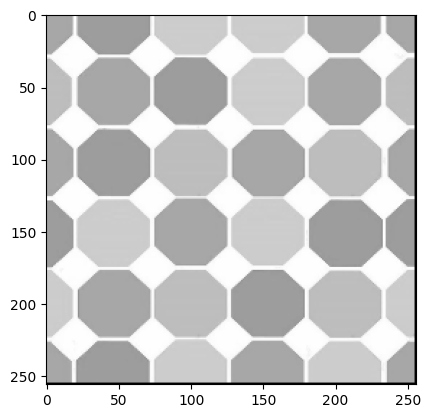

In [40]:
# LL = obj.approximate()
# LH = obj.horizontal()
# HL = obj.vertical()
HH = obj.diagonal()
invers = inverse_wavelet(LL,LH,HL,HH, ilo, ihi)
res = invers.result()
plt.imshow(res, cmap="gray")


In [41]:
# cv2.imwrite("LL_subaru.jpg",LL)
# cv2.imwrite("HL_subaru.jpg",HL)
# cv2.imwrite("LH_subaru.jpg",LH)
cv2.imwrite("HH_subaru.jpg",HH)

True

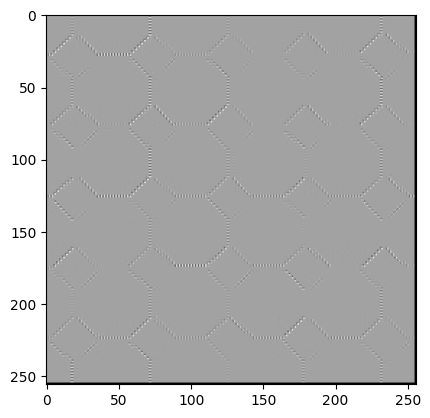

In [42]:
ll_subadrun = mig.imread("LL_subaru.jpg")
lh_subadrun = mig.imread("HL_subaru.jpg")
hl_subadrun = mig.imread("LH_subaru.jpg")
hh_subadrun = mig.imread("HH_subaru.jpg")
invers = inverse_wavelet(
    ll_subadrun,
    lh_subadrun,
    hl_subadrun,
    hh_subadrun,
    ilo, ihi)
res = invers.result()
plt.imshow(res, cmap="gray")

# TESTING 

In [ ]:
# testing
con = np.zeros([5,10], dtype="int")

arr = np.array([
    [1,1,1,1,1],
    [1,1,1,1,1],
    [1,1,1,1,1],
    [1,1,1,1,1],
    [1,1,1,1,1],
])

con[::,::2] = arr

In [ ]:
con

array([[1, 0, 1, 0, 1, 0, 1, 0, 1, 0],
       [1, 0, 1, 0, 1, 0, 1, 0, 1, 0],
       [1, 0, 1, 0, 1, 0, 1, 0, 1, 0],
       [1, 0, 1, 0, 1, 0, 1, 0, 1, 0],
       [1, 0, 1, 0, 1, 0, 1, 0, 1, 0]])